##**Please ensure that these packages before running the notebook preferably on google colab or it will result in errors**

In [ ]:
!pip install scikit-plot
!pip install contractions

     |████████████████████████████████| 245kB 5.9MB/s 
     |████████████████████████████████| 317kB 6.6MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81699 sha256=65955de50d4ded62186ad7320d3cef55f17339eadf21a00a8de77d62420ae83b
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


# Importing the libraries

In [ ]:
import numpy as np
import pandas as pd

import string
from nltk import FreqDist, word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
import contractions
import nltk 
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import *
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scikitplot.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from PIL import Image
import requests

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Loading the dataset
train = pd.read_csv("train_set.csv")
test = pd.read_csv("test_set.csv")
#sub_sample = pd.read_csv("sample_submission.csv")

train.head(20)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


In [ ]:
test.head(20)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
5,6,"Ke feela dilense tše hlakilego, tša pono e tee..."
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...
9,10,"So, on occasion, are statistics misused."


In [ ]:
#checking the shapes of the data
train.shape, test.shape

((20761, 2), (5682, 2))

In [ ]:
#exploring the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20761 entries, 0 to 20760
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  20761 non-null  object
 1   text     20761 non-null  object
dtypes: object(2)
memory usage: 324.5+ KB


# Data Pre Processing

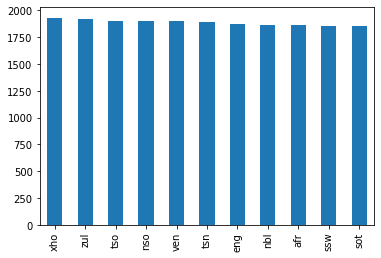

In [ ]:
train['lang_id'].value_counts().plot(kind= 'bar')

### We have balanced classes each class has 3000 instances

In [ ]:
train.isnull().sum()

lang_id    0
text       0
dtype: int64

In [ ]:
test.isnull().sum()

index    0
text     0
dtype: int64

In [ ]:
blanks = []  # start with an empty list

for i,li,text in train.itertuples():  # iterate over the DataFrame
    if type(text)==str:            # avoid NaN values
        if text.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list

train.drop(blanks, inplace=True)

In [ ]:
blanks = []  # start with an empty list

for i,li,text in test.itertuples():  # iterate over the DataFrame
    if type(text)==str:            # avoid NaN values
        if text.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list

test.drop(blanks, inplace=True)

In [ ]:
def fix_contractions(x):
  return contractions.fix(x)

In [ ]:
def token_words(text):
  return word_tokenize(text)

In [ ]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [ ]:
def normalize_corpus(corpus, text_lower_case=True,  contraction_expansion=True, special_char_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        # remove accented characters
        #if accented_char_removal:
        #    doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = fix_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [ ]:


# Clean Data 
train['text'] = normalize_corpus(train['text'])

test['text'] = normalize_corpus(test['text'])

### Splitting the dataset

In [ ]:
# getting y and X metrics 
X = train['text']
y = train['lang_id']
# splitting the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)


### Training and Tuniing base models on raw data
- LinearSVC and RidgeCV

In [ ]:
# Defining Linearsvc pipeline
pipe_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC(random_state=0, tol=1e-5)),
])

# Feed the training data through the pipeline
lin_mod = pipe_lsvc.fit(X_train, y_train)  

# Form a prediction set
lin_pred = lin_mod.predict(X_val)

# Print a classification report
print(metrics.classification_report(y_val,lin_pred))

In [ ]:
# plotiing confusion metrics
plot_confusion_matrix(y_val, lin_pred, normalize=True,figsize=(8,8),cmap='Blues')

In [ ]:
# getting our test set ready
X_test= test['text']

# Making predictions on the dataser and adding a sentiment column to our original test_df
test['lang_id'] = lin_mod.predict(X_test)

#creating an output csv for submission
test[['index','lang_id']].to_csv('testsubmission4.csv', index=False)

In [ ]:
pipe_lsvc.get_params() # getting the oarameters of Linearsvc


In [ ]:
# Hypertuning LinearSCV model
lin_param_grid = {'clf__C':[1, 1.01, 1.02, 1.03],
                 'tfidf__max_df':(0.9, 0.999),
                 'tfidf__min_df':(0, 0.00001, 0.001),
                 'tfidf__ngram_range':[(1,2), (1,3), (1,4), (1,5)] 
                 }
cv = StratifiedKFold(n_splits=2,shuffle=True, random_state = 42)
grid_search = GridSearchCV(estimator=pipe_lsvc , cv=cv, param_grid=lin_param_grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


In [ ]:
# Defining countvectorizer
count_vect= CountVectorizer(analyzer = 'char', tokenizer = None,preprocessor = None, stop_words = None, max_features = 180000,min_df = 1,ngram_range = (1,3))

In [ ]:
pipe_Ridge = Pipeline([('vect', count_vect),
                     ('ridge', RidgeClassifierCV()),
])

# Feed the training data through the pipeline
ridge_mod = pipe_Ridge.fit(X_train, y_train)  

# Form a prediction set
ridge_pred = ridge_mod.predict(X_val)

# Print a classification report
print(metrics.classification_report(y_val,ridge_pred))

In [ ]:
# plotiing confusion metrics
plot_confusion_matrix(y_val, ridge_pred, normalize=True,figsize=(8,8),cmap='Blues')

In [ ]:
# getting our test set ready
X_test= test['text']

# Making predictions on the dataser and adding a sentiment column to our original test_df
test['lang_id'] = ridge_mod.predict(X_test)

#creating an output csv for submission
test[['index','lang_id']].to_csv('testsubmission10.csv', index=False)

In [ ]:
pipe_naive =Pipeline([('clf',  TfidfVectorizer()),
                      ('svc', MultinomialNB()),
                     ])
# Feed the training data through the pipeline
naive_mod = pipe_naive.fit(X_train, y_train)  

# Form a prediction set
naive_pred = naive_mod.predict(X_val)

# Print a classification report
print(metrics.classification_report(y_val,naive_pred))

In [ ]:
naive_mod.get_params()

In [ ]:
params={
    'clf__ngram_range': [(1, 1),(1,2),(1,3),(1,4)],
    'svc__alpha':[0.001,0.01,0.1,1]
}
Kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
grid = GridSearchCV(pipe_naive,param_grid=params,n_jobs=-1,cv=Kfold,verbose=3)

grid.fit(X_train,y_train)
model = grid.best_estimator_

# summarize results
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# getting our test set ready
X_test= test['text']

# Making predictions on the dataser and adding a sentiment column to our original test_df
test['lang_id'] = grid.best_estimator_.predict(X_test)

#creating an output csv for submission
test[['index','lang_id']].to_csv('testsubmission12.csv', index=False)

In [ ]:
# plotiing confusion metrics
plot_confusion_matrix(y_val, naive_pred, normalize=True,figsize=(8,8),cmap='Blues')

In [ ]:
# Training models on clean data
pipe_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC(random_state=0, tol=1e-5)),
])

# Feed the training data through the pipeline
lin_mod = pipe_lsvc.fit(X_train, y_train)  

# Form a prediction set
lin_pred = lin_mod.predict(X_val)

# Print a classification report
print(metrics.classification_report(y_val,lin_pred))

In [ ]:
# getting our test set ready
X_test= test['text']

# Making predictions on the dataser and adding a sentiment column to our original test_df
test['lang_id'] = lin_mod.predict(X_test)

#creating an output csv for submission
test[['index','lang_id']].to_csv('testsubmission8.csv', index=False)

In [ ]:
# Defining countvectorizer
count_vect= CountVectorizer(analyzer = 'char', tokenizer = None,preprocessor = None, stop_words = None, max_features = 180000,min_df = 1,ngram_range = (1,3))

In [ ]:
pipe_Ridge = Pipeline([('vect', count_vect),
                     ('clf', RidgeClassifierCV()),
])

# Feed the training data through the pipeline
ridge_mod = pipe_Ridge.fit(X_train, y_train)  

# Form a prediction set
ridge_pred = ridge_mod.predict(X_val)

# Print a classification report
print(metrics.classification_report(y_val,ridge_pred))

In [ ]:
# getting our test set ready
X_test= test['text']

# Making predictions on the dataser and adding a sentiment column to our original test_df
test['lang_id'] = ridge_mod.predict(X_test)

#creating an output csv for submission
test[['index','lang_id']].to_csv('testsubmission9.csv', index=False)

In [ ]:
def train_knn(x, y, k):
    '''Returns the trained k nearest neighbors classifier
    
    train_knn(x, y, k) -> sklearn.neighbors.KNeighborsClassifier
    '''
    pipe_knn = pipe_naive =Pipeline([('clf',  TfidfVectorizer()),
                      ('knn', KNeighborsClassifier(k)),
                     ])
    pipe_knn.fit(X_train, y_train)
    return pipe_knn
 
def test_knn(pipe_knn, X, Y):
    '''Tests a given classifier with a testset and return result
    
    text_knn(clf, X, Y) -> float
    '''
    predictions = pipe_knn.predict(X_val)
    ratio_correct = accuracy_score(y_val, predictions)
    return ratio_correct
 
print('''k\tPercentage of correctly predicted language
__________________________________________________''')
for i in range(1, 16):
    clf = train_knn(X_train, y_train, i)
    ratio_correct = test_knn(clf, X_val, y_val)
    print(str(i) + '\t' + str(round(ratio_correct * 100, 3)) + '%')

In [ ]:
knn_mod = train_knn(X_train,y_train,15)

In [ ]:
kn_accuracy = test_knn(knn_mod,X_val,y_val)
print(kn_accuracy)

In [ ]:
# getting our test set ready
X_test= test['text']

# Making predictions on the dataser and adding a sentiment column to our original test_df
test['lang_id'] = knn_mod.predict(X_test)

#creating an output csv for submission
test[['index','lang_id']].to_csv('testsubmission13.csv', index=False)

Naive Bayes obtained higher score as to compared to other models

In [ ]:
# Defining Linearsvc pipeline
pipe_log = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression(C=0.90,max_iter=1000,penalty='l2' )),
])

# Feed the training data through the pipeline
log_mod = pipe_log.fit(X_train, y_train)  

# Form a prediction set
log_pred = log_mod.predict(X_val)

# Print a classification report
print(metrics.classification_report(y_val,log_pred))

In [ ]:
# plotiing confusion metrics
plot_confusion_matrix(y_val, log_pred, normalize=True,figsize=(8,8),cmap='Blues')

In [ ]:
# getting our test set ready
X_test= test['text']

# Making predictions on the dataser and adding a sentiment column to our original test_df
test['lang_id'] = log_mod.predict(X_test)

#creating an output csv for submission
test[['index','lang_id']].to_csv('testsubmission13.csv', index=False)